In [91]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx
from mpl_toolkits.axes_grid1 import make_axes_locatable

Read in the shapefiles that were created to visualize ponds located in PG Counties watershed 0226 and 0228 in Maryland as well as the watershed boundary shapefile using geopandas. 

In [57]:
water = gpd.read_file('Shapefile/drawn_water_bo_ExportFeature1.shp')
boundary = gpd.read_file('Shapefile/md12digit18may2005_ClipLayer.shp')

Make sure both of the projections are the same using to_crs

In [58]:
water = water.to_crs(crs=3857)
boundary = boundary.to_crs(crs=3857)

In [59]:
boundary_df = gpd.GeoDataFrame(boundary)
water_df = gpd.GeoDataFrame(water)

In [66]:
boundary_df.head()

,FID_,AREA,PERIMETER,POLY_,SWSHED3M_,ACRE,X_COORD,Y_COORD,MDE6DIGT,MDE6NAME,...,STFIPS,CNTYFIPS,CO,REG_REGION,MDE12NAME,HECTARES,ACRES,SHAPE_Leng,SHAPE_Area,geometry
0,800,1.678529e+07,24040.410,800.0,801.0,4147.65,868985.5000,329417.41,021311,PATUXENT RIVER,...,24,033,PG,5.0,None,1678.53,4147.720,716.210056,5.910720e+01,"POLYGON ((-8542870.215 4681376.447, -8542846.0..."
1,807,2.072885e+07,29243.902,807.0,808.0,5122.10,879146.0625,317040.78,021311,PATUXENT RIVER,...,24,"009,033","CA,PG",5.0,None,2072.89,5122.191,29137.722017,2.070238e+07,"POLYGON ((-8542815.957 4679405.532, -8542782.5..."
2,818,2.256919e+07,23504.748,818.0,819.0,5576.85,864771.2500,311869.28,021311,PATUXENT RIVER,...,24,033,PG,5.0,None,2256.92,5576.947,23503.949396,2.256473e+07,"POLYGON ((-8550228.271 4675556.377, -8550292.8..."
3,853,1.782459e+07,18182.053,854.0,855.0,4404.46,885722.2500,280117.41,021311,PATUXENT RIVER,...,24,"009,033","CA,PG",5.0,None,1782.46,4404.535,18118.837080,1.774836e+07,"POLYGON ((-8535737.188 4662868.918, -8535778.9..."
4,821,2.094244e+07,21339.479,821.0,822.0,5174.88,845952.3750,304499.06,021401,LOWER POTOMAC RIVER,...,24,"017,033","CH,PG",5.0,None,2094.24,5174.970,4478.335559,1.191404e+03,"MULTIPOLYGON (((-8550938.495 4674023.289, -855..."


In [73]:
water_df.head()

,pond_id,pond_id_1,lat__deg_,long__deg_,google_map,watershed,sdat_recor,county_1,district_1,tax_acct_1,...,tax_acct_3,owner_na_2,usage_3,sqft,acre,F2000__,ObjectID,Shape_Leng,Shape_Area,geometry
0,1,1.0,38.646198,-76.806988,"https://www.google.com/maps?q=38.6461977,-76.8...",021401080769,https://sdat.dat.maryland.gov/RealProperty/Pag...,17,08,0828574,...,None,None,None,268335.0,6.160124,1,1,832.613472,26741.371673,"POLYGON ((-8549788.608 4670479.723, -8549746.7..."
1,3,3.0,38.641445,-76.802955,"https://www.google.com/maps?q=38.6414449,-76.8...",021401080769,https://sdat.dat.maryland.gov/RealProperty/Pag...,17,08,0828574,...,None,None,None,223621.0,5.133632,0,3,996.295001,47005.082409,"POLYGON ((-8550398.477 4671096.664, -8550344.6..."
2,2,2.0,38.646989,-76.800914,"https://www.google.com/maps?q=38.6469893,-76.8...",021401080769,https://sdat.dat.maryland.gov/RealProperty/Pag...,17,08,0828640,...,None,None,None,106776.0,2.451240,1,2,728.341634,13224.223639,"POLYGON ((-8549500.073 4671168.232, -8549501.6..."
3,4,4.0,38.650881,-76.790772,"https://www.google.com/maps?q=38.650881,-76.79...",021401080769,https://sdat.dat.maryland.gov/RealProperty/Pag...,17,08,0828590,...,None,None,None,298205.0,6.845845,0,4,1287.375235,33680.497253,"POLYGON ((-8548434.772 4671843.498, -8548414.1..."
4,5,5.0,38.649155,-76.786194,"https://www.google.com/maps?q=38.6491548,-76.7...",021401080769,https://sdat.dat.maryland.gov/RealProperty/Pag...,17,08,0828699,...,None,None,None,467774.0,10.738613,0,5,3045.783341,56346.943300,"POLYGON ((-8547719.704 4671259.126, -8547725.3..."


In [61]:
boundary = boundary.boundary

Plots the polygons representing the ponds in blue as well as the drawn boundaries which represent the 12 digit watershed codes within watershed 0226 and 0228.

Text(0.5, 1.0, 'Ponds in PG County Watersheds 0226 and 0228')

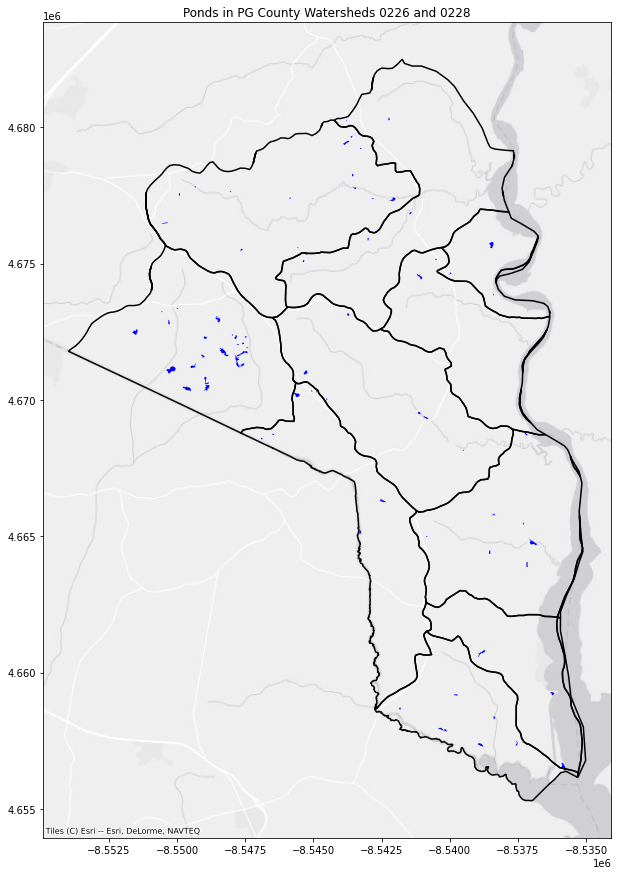

In [74]:
fig, ax = plt.subplots(figsize = (15,15))

boundary.plot(ax=ax, color = 'black')
water.plot(ax=ax, color = 'blue')
cx.add_basemap(ax, source= cx.providers.Esri.WorldGrayCanvas)
plt.title('Ponds in PG County Watersheds 0226 and 0228')

Create a new table which sums up the amount of ponds in each of the 12 digit watersheds

In [72]:
result = gpd.sjoin(water_df,boundary_df, op='within')

count_per = result['FID_'].value_counts().reset_index()
count_per.columns = ['FID_','polygon_count']

count_per.head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3280: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,FID_,polygon_count
0,833,20
1,818,15
2,850,7
3,836,7
4,877,6
5,853,6
6,807,5
7,828,3
8,872,2
9,834,2


Merges the table created above to one of the geodataframes so a choropleth map can be created based on the count

In [80]:
merged = boundary_df.merge(count_per, left_on = 'FID_',right_on = 'FID_')

Plots a choropleth map based on the count of each of the 12 digit watershed boundaries while also creating a colorbar based on the min and max values

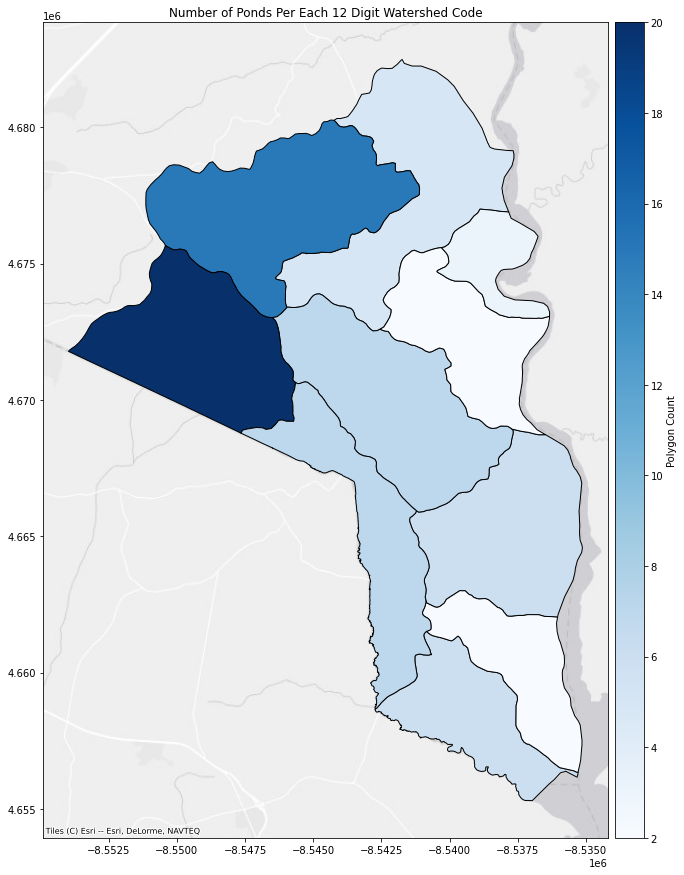

In [106]:
fig,ax = plt.subplots(figsize = (15,15))
merged.plot(ax=ax, column = 'polygon_count',cmap = 'Blues',edgecolor = 'black')
cx.add_basemap(ax, source= cx.providers.Esri.WorldGrayCanvas)
plt.title('Number of Ponds Per Each 12 Digit Watershed Code')

min_value = merged['polygon_count'].min()
max_value = merged['polygon_count'].max()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min_value, vmax=max_value)), cax=cax)
cbar.set_label('Polygon Count')

Gives a total count of the digitized ponds in the layer

In [78]:
total_ponds = sum(count_per['polygon_count'])
print(total_ponds)

73
